In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import json
import os
import re
import matplotlib.pyplot as plt

In [2]:
data_dir = Path.cwd()
projet_file = "projet.json"

## Rouler le modèle

In [3]:
from hsamiplus.hsamibin import hsamibin

In [15]:
s = {}
etats = {}
deltas = {}

In [4]:
%%time
s, etats, deltas = hsamibin(data_dir, projet_file)


CPU times: user 45 s, sys: 2.49 s, total: 47.5 s
Wall time: 50.4 s


### Etats

In [5]:
etats

{'eau_hydrogrammes': [[[0.006225484974128852, 0.0, 0.00044140787650784785],
   [0.0034214185611731946, 0.0, 0.0002435491522776476],
   [0.0018265555623353706, 0.0, 0.0001305124009288725],
   [0.0009547822876580056, 0.0, 6.850606570265149e-05],
   [0.0004888674141725011, 0.0, 3.524927229894017e-05],
   [0.00024334209143499598, 0.0, 1.766938305378178e-05],
   [0.00011551411845535596, 0.0, 8.473628435456541e-06],
   [4.974090452840551e-05, 0.0, 3.7043805413284066e-06],
   [1.6427362982705647e-05, 0.0, 1.2507371442820306e-06],
   [0.0, 0.0, 0.0]],
  [[0.012882808695421823, 0.0, 0.0004527480040951236],
   [0.007241334788106945, 0.05616690350834658, 0.0002502374710088088],
   [0.003928523519512309, 0.0, 0.00013425784662269818],
   [0.0020855387979123287, 0.0, 7.055294495895344e-05],
   [0.001088470772406163, 0.0, 3.635584954428197e-05],
   [0.000558457359983542, 0.0, 1.826745537137184e-05],
   [0.00028022402421565957, 0.0, 8.800545409041322e-06],
   [0.00013569877731660425, 0.0, 3.8879228621

In [6]:
for k in etats.keys():
    print(k)

eau_hydrogrammes
neige_au_sol
fonte
nas_tot
fonte_tot
derniere_neige
gel
nappe
reserve
sol
mh_surf
mh_vol
ratio_MH
mhumide
ratio_qbase
cumdegGel
obj_gel
dernier_gel
reservoir_epaisseur_glace
reservoir_energie_glace
reservoir_superficie
reservoir_superficie_glace
reservoir_superficie_ref
eeg
ratio_bassin
ratio_reservoir
ratio_fixe


In [7]:
etats["eau_hydrogrammes"]

[[[0.006225484974128852, 0.0, 0.00044140787650784785],
  [0.0034214185611731946, 0.0, 0.0002435491522776476],
  [0.0018265555623353706, 0.0, 0.0001305124009288725],
  [0.0009547822876580056, 0.0, 6.850606570265149e-05],
  [0.0004888674141725011, 0.0, 3.524927229894017e-05],
  [0.00024334209143499598, 0.0, 1.766938305378178e-05],
  [0.00011551411845535596, 0.0, 8.473628435456541e-06],
  [4.974090452840551e-05, 0.0, 3.7043805413284066e-06],
  [1.6427362982705647e-05, 0.0, 1.2507371442820306e-06],
  [0.0, 0.0, 0.0]],
 [[0.012882808695421823, 0.0, 0.0004527480040951236],
  [0.007241334788106945, 0.05616690350834658, 0.0002502374710088088],
  [0.003928523519512309, 0.0, 0.00013425784662269818],
  [0.0020855387979123287, 0.0, 7.055294495895344e-05],
  [0.001088470772406163, 0.0, 3.635584954428197e-05],
  [0.000558457359983542, 0.0, 1.826745537137184e-05],
  [0.00028022402421565957, 0.0, 8.800545409041322e-06],
  [0.00013569877731660425, 0.0, 3.887922862158523e-06],
  [6.145332043242664e-05, 

In [8]:
for k in s.keys():
    print(k)

Qtotal
Qbase
Qinter
Qsurf
Qreservoir
Qglace
ETP
ETRtotal
ETRsublim
ETRPsurN
ETRintercept
ETRtranspir
ETRreservoir
ETRmhumide
Qmh
Dates


In [9]:
np.vstack((s['Qtotal'], s['Qbase'], s['Qsurf'])).T.shape

(23376, 3)

In [10]:
Sim = pd.DataFrame(np.vstack((s['Qtotal'], s['Qbase'], s['Qsurf'],
                        s['ETP'], s['ETRtotal'])).T,
                   index=pd.DatetimeIndex([pd.Timestamp(*dt) for dt in s['Dates']]),
                   columns=['Qtotal', 'Qbase', 'Qsurf', 'ETP', 'ETRtotal'])

<Axes: >

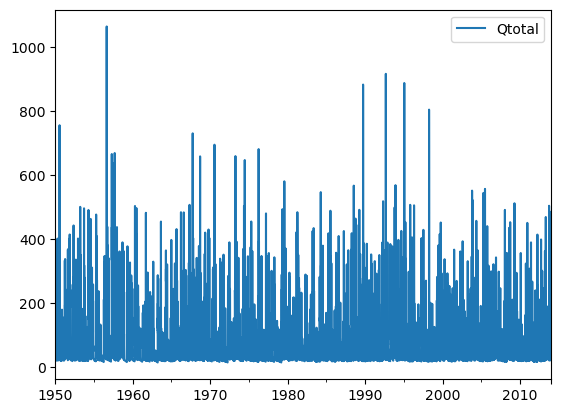

In [11]:
Sim[['Qtotal']].plot()

Text(0, 0.5, '[m$^3$/s]')

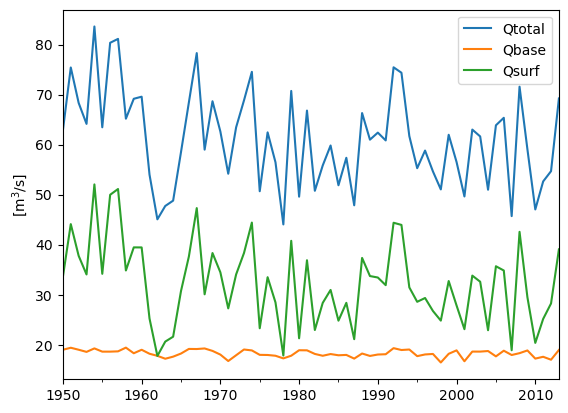

In [12]:
Sim[['Qtotal', 'Qbase', 'Qsurf']].resample('YE').apply('mean').plot()
plt.ylabel('[m$^3$/s]')

Text(0, 0.5, '[cm]')

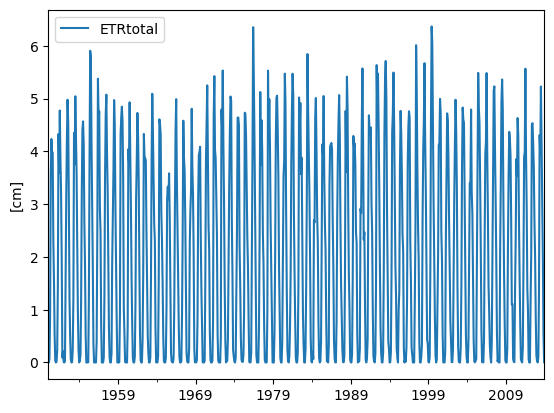

In [13]:
Sim[['ETRtotal']].resample('ME').apply('sum').plot()
plt.ylabel('[cm]')

<Axes: >

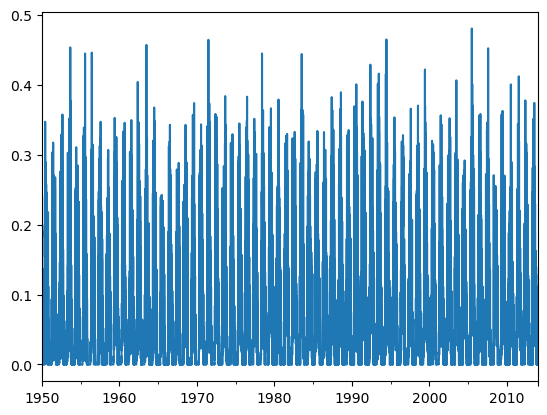

In [14]:
Sim['ETRtotal'].plot()